# **WATERMARKING_OpenCV**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


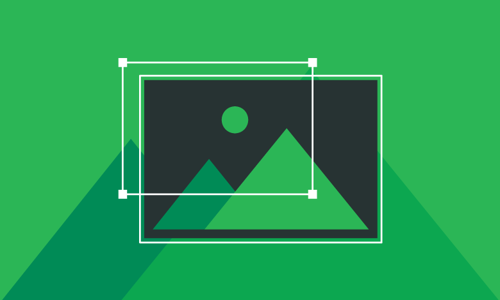

In [48]:
# Important library imports

from google.colab import drive
drive.mount('/content/drive')

import os
os.getcwd()

import cv2
import numpy as np
import requests
from PIL import Image

# Reading image form url
image = Image.open(requests.get('https://media.sproutsocial.com/uploads/2017/02/10x-featured-social-media-image-size.png', stream=True).raw)
image_logow = image.resize((500,300))
image_textw = image.resize((500,300))
image_logow

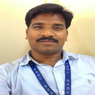

In [49]:
# Reading logo form url
#logo = Image.open(requests.get('https://pianalytix.com/wp-content/uploads/2020/05/cropped-pianalytiX-full-logo-square-2-209x52.png', stream=True).raw)
logo = Image.open('drive/MyDrive/Content/Photo.png')
logo = logo.resize((95, 95))
logo

In [50]:
# Convert the image into RGB and get the shape

image_logow = np.array(image_logow.convert('RGB'))
h_image, w_image, _ = image_logow.shape
logo = np.array(logo.convert('RGB'))
h_logo, w_logo, _ = logo.shape

# Get the center of the original. It's the location where we will place the watermark
center_y = int(h_image / 2)
center_x = int(w_image / 2)
top_y = center_y - int(h_logo / 2)
left_x = center_x - int(w_logo / 2)
bottom_y = top_y + h_logo
right_x = left_x + w_logo

In [51]:
# Image size, in pixels. The size is given as a 2-tuple (width, height).
print("Image_logow image size : ",image_logow.shape) 
print("Logo image size : ",logo.shape)

Image_logow image size :  (300, 500, 3)
Logo image size :  (95, 95, 3)


In [52]:
# Get ROI
roi = image_logow[top_y: bottom_y, left_x: right_x]
# Add the Logo to the Roi
result = cv2.addWeighted(roi, 1, logo, 1, 0)
# Drawing
cv2.line(image_logow, (0, center_y), (left_x, center_y), (0, 0, 255), 1)
cv2.line(image_logow, (right_x, center_y), (w_image, center_y), (0, 0, 255), 1)
# Replace the ROI on the image
image_logow[top_y: bottom_y, left_x: right_x] = result

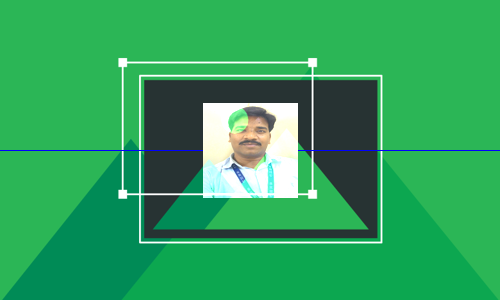

In [53]:
# Ploting logo watermark image
img = Image.fromarray(image_logow, 'RGB')
img

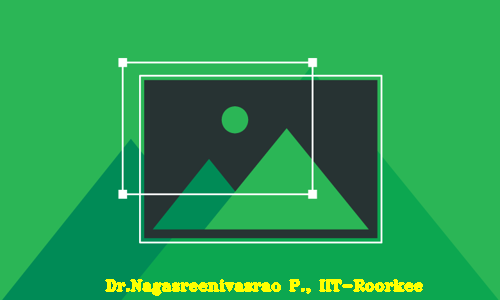

In [76]:
# Text Watermark
image_text = np.array(image_textw.convert('RGB'))
cv2.putText(image_text, text='Dr.Nagasreenivasrao P., IIT-Roorkee', org=(w_image - 395, h_image - 10), fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=0.5,
            color=(255,255,0), thickness=2, lineType=cv2.LINE_4); 

# Plotting text watermark image
timg = Image.fromarray(image_text, 'RGB')
timg